# Obtener datos de APIs
> API: Application Programming Interface. Es un conjunto programas que podemos usar gracias a que están publicados los métodos o procedimientos para accederlos.

### Obtener datos de la API de Spotify
La documentación de la API de Spotify se encuentra en <a href="https://developer.spotify.com/documentation/">Documentación API</a>
##### Pasos para poder usar la API
<ol>
    <li>Tener cuenta de Spotify</li>
    <li>Crear una aplicación</li>
    <ol>
        <li>Ir a <a href="https://developer.spotify.com/dashboard/">developer dashboard y loguearse</a></li>
        <li>Ir a Apply->Apply for a developer account</li>
        <li>Hay que crear una app: __Create an app__ Se pide indicar el nombre y la descripción</li>
        <li>Una vez creada la aplicación, copiar y pegar debajo el client id y el client secret</li>
    </ol>
</ol>


Python tiene una librería que facilita el uso de la API de Twitter: _tweepy_ y otra la conexión con Spotify. Hay que instalarlas en la consola de Anaconda (Anaconda prompt) con:
1. __pip install tweepy__ 
2. __pip install spotipy__   
O en Colab  
<code>
!pip install tweepy
!pip install spotipy
</code>

In [ ]:
!pip install tweepy
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import tweepy
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import networkx as nx
import matplotlib.pyplot as plt 
%matplotlib inline

### Completar en la siguiente celda el client_id y el client_secret con los valores obtenidos en la consola de Spotify

In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="",
                                                           client_secret=""))


Buscamos un artista (ingresar el nombre al lado de <code>q=</code>)

In [ ]:
results = sp.search(q='Michel Bubble', type='artist', limit=20)
results

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Michel+Bubble&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1GxkXlMwML1oSg5eLPiAz3'},
    'followers': {'href': None, 'total': 5381952},
    'genres': ['adult standards', 'canadian pop', 'jazz pop', 'lounge'],
    'href': 'https://api.spotify.com/v1/artists/1GxkXlMwML1oSg5eLPiAz3',
    'id': '1GxkXlMwML1oSg5eLPiAz3',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5ebef8cf61fea4923d2bde68200',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab67616100005174ef8cf61fea4923d2bde68200',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f178ef8cf61fea4923d2bde68200',
      'width': 160}],
    'name': 'Michael Bublé',
    'popularity': 73,
    'type': 'artist',
    'uri': 'spotify:artist:1GxkXlMwML1oSg5eLPiAz3'}],
  'limit': 20,
  'next': None,
  'offset': 0,
  'pr


### Miramos el resultado y tratamos de encontrar el artist id


In [ ]:
results['artists'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [ ]:
results['artists']['items'][0].keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [ ]:
results['artists']['items'][0]['id']

'1GxkXlMwML1oSg5eLPiAz3'

el **[0]** lo que haec es quitarle al codigo el formato de lista que tiene, es como que indica al codigo que muestre todo lo que esta adentro de la lista asi pierde su condicion de lista.

### Buscamos los Top Tracks del artista. Luego trataremos de listarlos

In [ ]:
#Copiar acá el código del artista encontrado
artistid= '1GxkXlMwML1oSg5eLPiAz3'#<--
top = sp.artist_top_tracks(artistid)
top

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1GxkXlMwML1oSg5eLPiAz3'},
      'href': 'https://api.spotify.com/v1/artists/1GxkXlMwML1oSg5eLPiAz3',
      'id': '1GxkXlMwML1oSg5eLPiAz3',
      'name': 'Michael Bublé',
      'type': 'artist',
      'uri': 'spotify:artist:1GxkXlMwML1oSg5eLPiAz3'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/3rpSksJSFdNFqk5vne8at2'},
    'href': 'https://api.spotify.com/v1/albums/3rpSksJSFdNFqk5vne8at2',
    'id': '3rpSksJSFdNFqk5vne8at2',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273b732a522a686bb304a5d3fdf',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02b732a522a686bb304a5d3fdf',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851b732a522a686bb304a5d3fdf',
      'width': 64}],
    'name': 'Michael Bublé',
    'release_date':

In [ ]:
top['tracks'][2]['name']

"Haven't Met You Yet"

In [ ]:
for track in top['tracks']:
    print('track     : ', track['name'])
    print('popularity: ', track['popularity'])
    print('Album     : ', track['album']['name'])
    print('cover art : ', track['album']['images'][0]['url'])
    

track     :  Sway
popularity:  77
Album     :  Michael Bublé
cover art :  https://i.scdn.co/image/ab67616d0000b273b732a522a686bb304a5d3fdf
track     :  Feeling Good
popularity:  67
Album     :  It's Time
cover art :  https://i.scdn.co/image/ab67616d0000b2735d7d966732bd44ac2a13b614
track     :  Haven't Met You Yet
popularity:  71
Album     :  Crazy Love
cover art :  https://i.scdn.co/image/ab67616d0000b273f0cc194252888c6658c706ab
track     :  Sway - Sped Up Version
popularity:  71
Album     :  Sway (Sped Up Version)
cover art :  https://i.scdn.co/image/ab67616d0000b273109c81e35de91ffb90fac564
track     :  Everything
popularity:  70
Album     :  Call Me Irresponsible
cover art :  https://i.scdn.co/image/ab67616d0000b2732ceedc8c879a1f6784fbeef5
track     :  Home
popularity:  63
Album     :  It's Time
cover art :  https://i.scdn.co/image/ab67616d0000b2735d7d966732bd44ac2a13b614
track     :  It's a Beautiful Day
popularity:  68
Album     :  To Be Loved
cover art :  https://i.scdn.co/image/a

Sería mejor si pudiéramos ver las imágenes directamente en el notebook.

Para poder hacerlo, necesitamos que sean leídas desde la url y para eso, la librería <code>imageio</code> ofrece el método <code>imread</code> que nos permite hacerlo

In [ ]:
from imageio import imread

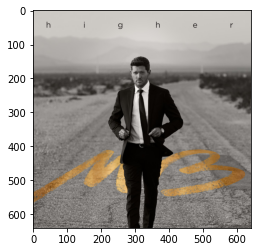

In [ ]:
a = imread("https://i.scdn.co/image/ab67616d0000b27393f378a9a1bed50491d01fb9") #<-url with an image
plt.imshow(a)
plt.show()


track: Sway Album: Michael Bublé popularity: 77 cover art: 


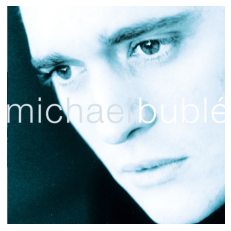


track: Feeling Good Album: It's Time popularity: 67 cover art: 


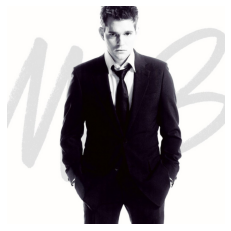


track: Haven't Met You Yet Album: Crazy Love popularity: 71 cover art: 


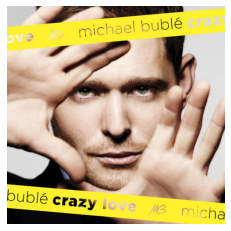


track: Sway - Sped Up Version Album: Sway (Sped Up Version) popularity: 71 cover art: 


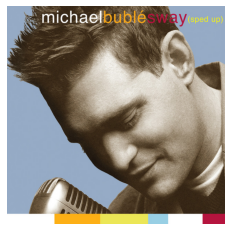


track: Everything Album: Call Me Irresponsible popularity: 70 cover art: 


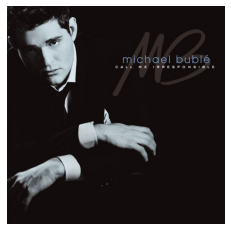


track: Home Album: It's Time popularity: 63 cover art: 


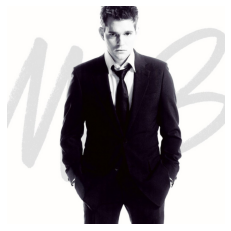


track: It's a Beautiful Day Album: To Be Loved popularity: 68 cover art: 


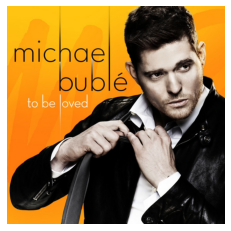


track: Love You Anymore Album: love (Deluxe Edition) popularity: 62 cover art: 


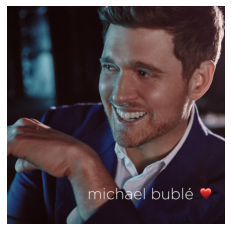


track: I'll Never Not Love You Album: Higher popularity: 55 cover art: 


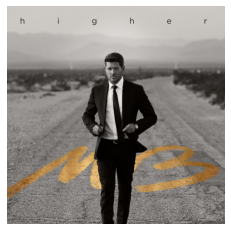


track: Higher Album: Higher popularity: 54 cover art: 


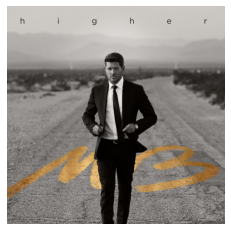

In [ ]:
for track in top['tracks'][:10]:
    print()
    print('track: ' + track['name'] + ' Album: '+ track['album']['name']+' popularity: '+ str(track['popularity'])+' cover art: ')
    a = imread(track['album']['images'][0]['url'])
    plt.imshow(a)
    plt.axis('off')
    plt.show()

### Almacenamos los datos en un dataframe y luego podemos grabarlo como csv para uso futuro.
Elegimos ciertos campos para guardar: artist, artist_id, album, track, track_id y popularity
Podemos elegir cualquier campo presente en el json de la respuesta

In [ ]:
#Creamos los nombres de las columnas
column_sp = ["artist", "artist_id", "album","track","track_id","popularity"]
#Creamos un DataFrame vacío con las columnas seleccionadas
sp_df = pd.DataFrame(columns = column_sp)
sp_df

,artist,artist_id,album,track,track_id,popularity


In [ ]:
tracks=top['tracks']

In [ ]:
#Por cada track creamos una fila en el dataframe sp_df
for i in range(len(tracks)):
    sp_df=sp_df.append({"artist":tracks[i]['artists'][0]['name'],
                        "artist_id":tracks[i]['artists'][0]['id'],
                        "album":tracks[i]['album']['name'],
                        "track":tracks[i]['name'],
                        "track_id":tracks[i]['id'],
                        "popularity":tracks[i]['popularity']}, ignore_index=True)
sp_df.head(5)

,artist,artist_id,album,track,track_id,popularity
0,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Michael Bublé,Sway,2ajUl8lBLAXOXNpG4NEPMz,77
1,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,It's Time,Feeling Good,3I09LQbHS3NSU46Ly3tPpR,67
2,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Crazy Love,Haven't Met You Yet,4fIWvT19w9PR0VVBuPYpWA,71
3,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Sway (Sped Up Version),Sway - Sped Up Version,3P4Lsg2MNqG8XLXZJUo4GT,71
4,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Call Me Irresponsible,Everything,4T6HLdP6OcAtqC6tGnQelG,70


In [ ]:
sp_df

,artist,artist_id,album,track,track_id,popularity
0,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Michael Bublé,Sway,2ajUl8lBLAXOXNpG4NEPMz,77
1,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,It's Time,Feeling Good,3I09LQbHS3NSU46Ly3tPpR,67
2,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Crazy Love,Haven't Met You Yet,4fIWvT19w9PR0VVBuPYpWA,71
3,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Sway (Sped Up Version),Sway - Sped Up Version,3P4Lsg2MNqG8XLXZJUo4GT,71
4,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Call Me Irresponsible,Everything,4T6HLdP6OcAtqC6tGnQelG,70
5,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,It's Time,Home,4wLZ4zPM9c4oe1VV8ejdWV,63
6,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,To Be Loved,It's a Beautiful Day,0mvkwaZMP2gAy2ApQLtZRv,68
7,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,love (Deluxe Edition),Love You Anymore,7JEUg9KqmpdIE5Nbb9ss66,62
8,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Higher,I'll Never Not Love You,0LJIVYOer8mlCmTrKoP9Kh,55
9,Michael Bublé,1GxkXlMwML1oSg5eLPiAz3,Higher,Higher,4bEpL49l4f0r8GtsjUFUqL,54


In [ ]:
sp_df.to_csv('datos_spotify.csv', index=False)

Con la función __track__ obtenemos más datos de un tema. Debemos pasar su id como parámetro.


Mostrar el link del tema a Spotify

### Obtener datos de la API de Twitter
La documentación de la API de twitter se encuentra en <a href="https://developer.twitter.com/en/docs">Documentación API Twitter</a>
##### Pasos para poder usar la API
<ol>
    <li>Tener cuenta de twitter con teléfono y mail asociado</li>
    <li>Crear una aplicación</li>
    <ol>
        <li>Ir a <a href="https://developer.twitter.com/en">developer.twitter.com</a></li>
        <li>Ir a Apply->Apply for a developer account</li>
        <li>Hay que crear una app. Se pide indicar la finalidad y explicarlo en inglés en 200 caracteres o más</li>
        <li>Una vez creada la aplicación, hay que cambiar el tipo de permiso desde el Dashboard (add permission - Edit)</li>
        <li>Ir a Keys and Tokens (mi App se llama Connect99) <img src="api1.PNG" align="left"/></li>
    </ol>
</ol>


Copiar las __consumer_key,consumer_secret,access_token,access_token_secret__ en la celda siguiente

In [ ]:
# API v1.1 #Ya no funciona...
consumer_key=""
consumer_secret= ""
access_token= ""
access_token_secret=""

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#Pedimos los datos de un usuario
data=api.get_user("LScola4")
print(data)


Dentro de __data__ hay un json del que podemos obtener los datos que nos interesan.

In [ ]:
datos= data._json
datos

In [ ]:
datos['name']

Usamos el método search para hacer una búsqueda. En el parámetro __q__ ponemos las palabras que queremos buscar. 
<a href="https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/standard-operators">Opciones de la búsqueda</a>. <br>
Tweepy tiene un método __Cursor__ que permite evitar el paginado que tiene la api de twitter. En __items__ indicamos cuántos tweets como máximo vamos recibir. Ahora vemos uno solo.

Podemos elegir un tema o un nombre para buscar. Empezamos con __"las leonas"__.

In [ ]:
twts = tweepy.Cursor(api.search,q="las leonas",tweet_mode="extended").items(1)
twts

Es un objeto iterable. Vamos a recorrerlo con FOR

In [ ]:
for tw in twts:
    twj=tw._json


Para ver mejor el json, usamos la funcion __dict__

In [ ]:
dict(twj)

Accedemos, por ejemplo, al id del usuario que emitió este tweet

In [ ]:
twj['user']['id']

Vamos a crear un dataFrame para ir guardando algunos datos de los tweets. Creamos un dataset vacío con las columnas:__created_at,full_text,user_id,user_name

In [ ]:
column_names = ["created_at", "full_text", "user_id","user_name","busqueda"]
mistw = pd.DataFrame(columns = column_names)
mistw

In [ ]:
tweets = tweepy.Cursor(api.search,q="las leonas",tweet_mode="extended").items(20)
tweets

In [ ]:
for tw in tweets:
    uno=tw._json
    mistw=mistw.append({'created_at':uno['created_at'],'full_text':uno['full_text'],'user_id':uno['user']['id'],'user_name':uno['user']['name']}, ignore_index=True)
    
    

In [ ]:
mistw

Podemos también obtener los tweets originales evitando los retweets

In [ ]:
mistw_sr = pd.DataFrame(columns = column_names)
tweets = tweepy.Cursor(api.search,q="las leonas -filter:retweets",tweet_mode="extended",lang='es').items(100)

In [ ]:
for tw in tweets:
    uno=tw._json
    mistw_sr=mistw_sr.append({'created_at':uno['created_at'],'full_text':uno['full_text'],'user_id':uno['user']['id'],'user_name':uno['user']['name'],'busqueda':0}, ignore_index=True)


In [ ]:
mistw_sr['busqueda']=0
mistw_sr.head(5)

In [ ]:
len(mistw_sr)

Vamos a hacer una búsqueda por otro tema para poder armar un corpus y así la próxima clase hacemos procesamiento de texto.

In [ ]:
#Completar con la segunda búsqueda
tweets = tweepy.Cursor(api.search,q="Ricky Martin -filter:retweets",tweet_mode="extended",lang='es').items(100)
for tw in tweets:
    uno=tw._json
    mistw_sr=mistw_sr.append({'created_at':uno['created_at'],'full_text':uno['full_text'],'user_id':uno['user']['id'],'user_name':uno['user']['name'],'busqueda':1}, ignore_index=True)
mistw_sr.tail(5)

In [ ]:
len(mistw_sr)

Grabamos los datos de DataFrame en un CSV para procesarlo en el futuro

In [ ]:
mistw_sr.to_csv('twssr.csv', index=False)

## Grafo de mi red
Vamos a almacenar los datos de nuestros contactos para poder visualizar el grafo que se genera a partir de las relaciones de seguimiento.

In [ ]:
misdatos=api.me()
misdatos._json

In [ ]:
md=misdatos.friends()
md

In [ ]:
md[0].screen_name

In [ ]:
columnas=['From','To']
mired=pd.DataFrame(columns = columnas)
for f in md:
    mired=mired.append({'From':misdatos.screen_name, 'To':f.screen_name}, ignore_index=True)
    data=api.get_user(f.screen_name)
    #sleep(10)
    for fof in data.friends()[:30]:
        mired=mired.append({'From':f.screen_name, 'To':fof.screen_name}, ignore_index=True)
mired

In [ ]:
mired.to_csv('mired.csv', index=False)